In [165]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from datetime import datetime
from pandas import read_csv
import add_data
%matplotlib inline

# Seeing Comparison

The plots below compare our circular buffer data for seeing to that of Mauna Kea Weather Service's reported data for the February run.  The orange line is our integrated seeing, which should be comparable to the DIMM, showin in blue.

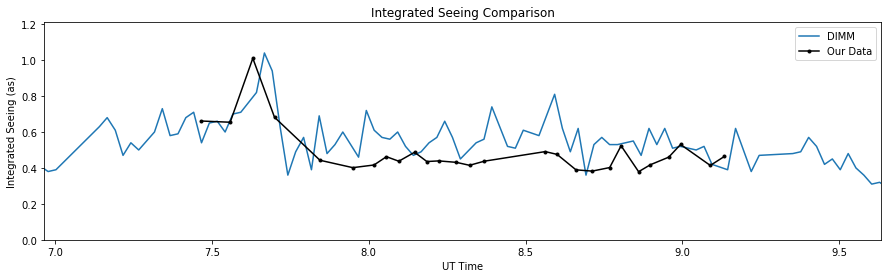

In [186]:
compare_seeing('20170214')

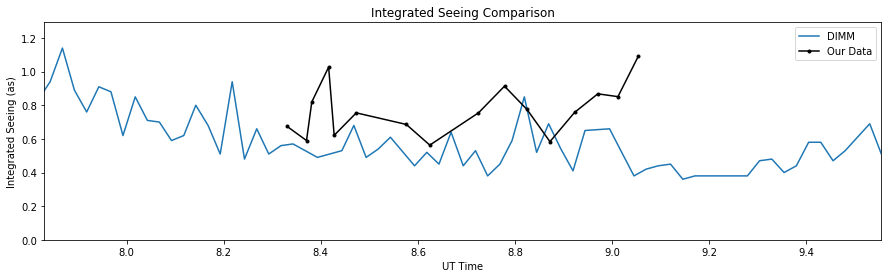

In [187]:
compare_seeing('20170215')

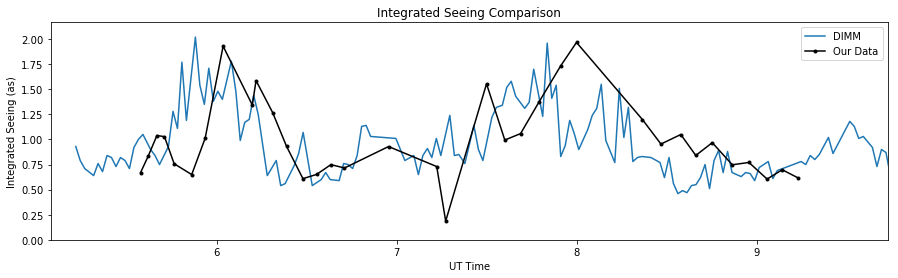

In [188]:
compare_seeing('20170216')

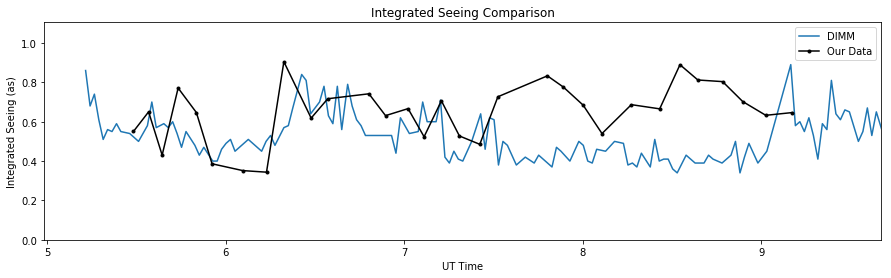

In [189]:
compare_seeing('20170217')

In [190]:
def compare_seeing(date):
    stat_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN4/"+date+"/FLI/reduce/stats/"
    alt_file = stat_dir + "profile-data_"+date+"-noTT.fits"

    stat_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN4/"+date+"/FLI/reduce/massdimm/"
    dimm_file = stat_dir +date+".dimm.dat"

    table = read_csv(dimm_file, delim_whitespace=True, names= \
                ['year', 'month', 'day', 'hour', 'minute', 'second', 'seeing'])

    year  = np.array(table['year'])
    month = np.array(table['month'])
    day   = np.array(table['day'])
    hour   = np.array(table['hour'])
    minute = np.array(table['minute'])
    second = np.array(table['second'])
    seeing = np.array(table['seeing'])
    hour += 10
    idx = np.where(hour >=24)[0]
    day[idx] += 1
    hour[idx] -= 24
    timeInHours = hour + (minute/60.0) + (second/3600.0)

    data = fits.getdata(alt_file)

    plt.figure(2, figsize=(15, 4))
    plt.plot(timeInHours, seeing, label='DIMM')
    plt.plot(data[:,0], data[:,1], 'k.-', label='Our Data')

    plt.axis([np.amin(data[:,0])-0.5, np.amax(data[:,0])+0.5,0, np.amax(data[:,1])+0.2])
    plt.xlabel('UT Time')
    plt.ylabel('Integrated Seeing (as)')
    plt.legend()
    plt.title('Integrated Seeing Comparison')
    
    return